In [1]:
%load_ext autoreload
%autoreload 2

# Training the VAE

In [89]:
import numpy as np
from keras import callbacks

from utils import data_generation
from vae_model import vae

import matplotlib.pyplot as plt
%matplotlib inline

## Model

In [138]:
vae_model = vae.VAE()

### Complete model (encoder + decoder)

In [139]:
# vae_model.model.summary()

### Encoder

In [140]:
# vae_model.encoder.summary()

### Decoder

In [141]:
# vae_model.decoder.summary()

## Generating the training data

In [142]:
nb_images = 500
image_width = 64
image_height = 64

images = np.zeros((nb_images, image_height, image_width, 3), dtype=np.uint8)

for i, x in enumerate(data_generation.rnd_circle_data_generator(nb_images,
                                                                image_width,
                                                                image_height,
                                                                (0, image_width),
                                                                (0, image_height),
                                                                (6, 24))):
    images[i] = x

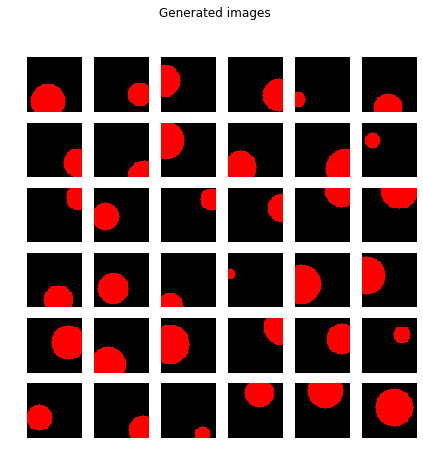

In [143]:
fig, axs = plt.subplots(6, 6, figsize=(7, 7))
fig.suptitle("Generated images")

for i, ax in enumerate(axs.flatten()):
    ax.axis("off")
    ax.imshow(images[i])

In [144]:
images = images.astype(np.float16) / 255.0

## Trainign the VAE

In [145]:
early_stopping = callbacks.EarlyStopping(monitor="loss", patience=5, verbose=1, restore_best_weights=True)

In [146]:
train_hist = vae_model.model.fit(images, images, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

Train on 450 samples, validate on 50 samples
Epoch 1/50
450/450 [==============================] - 4s 8ms/step - loss: 377298.9082 - vae_r_loss: 377297.4213 - vae_kl_loss: 1.4860 - val_loss: 127220.7188 - val_vae_r_loss: 126673.2422 - val_vae_kl_loss: 547.4744
Epoch 2/50
450/450 [==============================] - 1s 3ms/step - loss: 78755.1433 - vae_r_loss: 74965.0716 - vae_kl_loss: 3790.0709 - val_loss: 33482.2539 - val_vae_r_loss: 32908.0039 - val_vae_kl_loss: 574.2487
Epoch 3/50
450/450 [==============================] - 1s 3ms/step - loss: 37122.8547 - vae_r_loss: 36423.2476 - vae_kl_loss: 699.6067 - val_loss: 33426.4961 - val_vae_r_loss: 32456.2422 - val_vae_kl_loss: 970.2537
Epoch 4/50
450/450 [==============================] - 1s 3ms/step - loss: 37184.2590 - vae_r_loss: 36238.9747 - vae_kl_loss: 945.2829 - val_loss: 33281.6250 - val_vae_r_loss: 32455.0000 - val_vae_kl_loss: 826.6262
Epoch 5/50
450/450 [==============================] - 1s 3ms/step - loss: 37069.4210 - vae_r_los

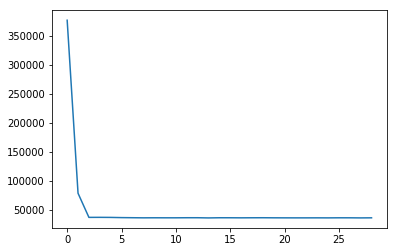

In [147]:
plt.plot(train_hist.history["loss"]);

## Test the VAE

### Encode images to a latent vector

In [148]:
encoded_images = vae_model.encoder.predict(images)

In [149]:
encoded_images.shape

(500, 32)

### Decode images

In [150]:
decoded_images = vae_model.decoder.predict(encoded_images)

In [151]:
decoded_images = decoded_images * 255
decoded_images = decoded_images.astype(np.uint8)

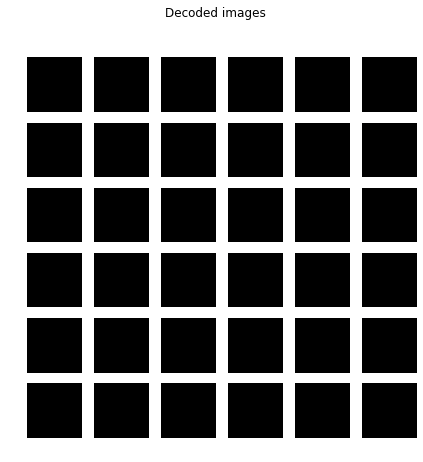

In [152]:
fig, axs = plt.subplots(6, 6, figsize=(7, 7))
fig.suptitle("Decoded images")

for i, ax in enumerate(axs.flatten()):
    ax.axis("off")
    ax.imshow(decoded_images[i])